In [11]:
import warnings
warnings.filterwarnings("ignore")
import numpy, pandas, os, matplotlib.pyplot as rvmp, seaborn as rvse, datetime, random
from sklearn import metrics, decomposition, model_selection, utils, pipeline,preprocessing, feature_selection, tree
from plotly import express
import plotly.graph_objects as go
import pickle
from IPython.display import display, HTML
from sklearn import tree,linear_model,svm,neighbors,neural_network,ensemble

##  **DATA READING**

In [12]:
SIIData=pandas.read_csv("Startups_India_Investments.csv")
if "Unnamed: 0" in SIIData.columns:
    SIIData=SIIData.drop("Unnamed: 0",axis=1)
SIIData.head()

,Startup_ID,Name,Sector,Sub-Sector,City,State,Founded_Year,Founder_Name,Funding_Stage,Investment_Type,...,Exit_Status,Acquisition_Details,Funding_Date,Pitch_Deck_Link,Social_Media_Followers,Competitors,Patents,ESG_Score,Diversity_Index,Net_Impact_Score
0,a713cd4f,Startup_0,Retail,Sub_2,Pune,Maharashtra,2022,Founder_356,Series D,Grant,...,No,NaN,2023-07-08,http://example.com/pitchdeck/0,27648,Competitor_88,11,5.32,39.33,4.71
1,b75f6987,Startup_1,EdTech,Sub_2,Pune,Karnataka,2019,Founder_93,IPO,Convertible Note,...,Yes,Acquirer_185,2017-01-02,http://example.com/pitchdeck/1,89143,Competitor_66,17,2.50,43.19,5.03
2,d5ba7ec2,Startup_2,AgriTech,Sub_7,Chennai,Tamil Nadu,2010,Founder_951,Series A,Grant,...,Yes,NaN,2022-06-20,http://example.com/pitchdeck/2,62445,Competitor_93,4,5.13,36.11,5.71
3,5190a643,Startup_3,HealthTech,Sub_8,Mumbai,Telangana,2007,Founder_538,IPO,Debt,...,Yes,NaN,2021-01-11,http://example.com/pitchdeck/3,30184,Competitor_31,13,9.14,31.38,9.29
4,a6801a40,Startup_4,HealthTech,Sub_6,Bangalore,Maharashtra,2019,Founder_69,Seed,Grant,...,No,NaN,2015-07-22,http://example.com/pitchdeck/4,56494,Competitor_27,0,8.10,78.20,1.12


In [13]:
Msngs=SIIData.isna().sum()
Msngs

Startup_ID                    0
Name                          0
Sector                        0
Sub-Sector                    0
City                          0
State                         0
Founded_Year                  0
Founder_Name                  0
Funding_Stage                 0
Investment_Type               0
Amount_Raised                 0
Investors_Count               0
Lead_Investor                 0
Co-Investors                  0
Valuation_Post_Funding        0
Revenue                       0
Profitability                 0
Number_of_Employees           0
Tech_Stack                    0
Primary_Product               0
Customer_Base_Size            0
Growth_Rate                   0
Exit_Status                   0
Acquisition_Details       10027
Funding_Date                  0
Pitch_Deck_Link               0
Social_Media_Followers        0
Competitors                   0
Patents                       0
ESG_Score                     0
Diversity_Index               0
Net_Impa

In [14]:
nmftsii=SIIData.dtypes[SIIData.dtypes!='object'].index.tolist()
obftsii=SIIData.dtypes[SIIData.dtypes=='object'].index.tolist()
for n in nmftsii:
    SIIData[n]=SIIData[n].fillna(SIIData[n].std())
for o in obftsii:
    SIIData[o]=SIIData[o].fillna(SIIData[o].mode()[0])
print(SIIData.isna().sum())
print(SIIData.info())

Startup_ID                0
Name                      0
Sector                    0
Sub-Sector                0
City                      0
State                     0
Founded_Year              0
Founder_Name              0
Funding_Stage             0
Investment_Type           0
Amount_Raised             0
Investors_Count           0
Lead_Investor             0
Co-Investors              0
Valuation_Post_Funding    0
Revenue                   0
Profitability             0
Number_of_Employees       0
Tech_Stack                0
Primary_Product           0
Customer_Base_Size        0
Growth_Rate               0
Exit_Status               0
Acquisition_Details       0
Funding_Date              0
Pitch_Deck_Link           0
Social_Media_Followers    0
Competitors               0
Patents                   0
ESG_Score                 0
Diversity_Index           0
Net_Impact_Score          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (t

In [15]:
SIIData.head()

,Startup_ID,Name,Sector,Sub-Sector,City,State,Founded_Year,Founder_Name,Funding_Stage,Investment_Type,...,Exit_Status,Acquisition_Details,Funding_Date,Pitch_Deck_Link,Social_Media_Followers,Competitors,Patents,ESG_Score,Diversity_Index,Net_Impact_Score
0,a713cd4f,Startup_0,Retail,Sub_2,Pune,Maharashtra,2022,Founder_356,Series D,Grant,...,No,Acquirer_429,2023-07-08,http://example.com/pitchdeck/0,27648,Competitor_88,11,5.32,39.33,4.71
1,b75f6987,Startup_1,EdTech,Sub_2,Pune,Karnataka,2019,Founder_93,IPO,Convertible Note,...,Yes,Acquirer_185,2017-01-02,http://example.com/pitchdeck/1,89143,Competitor_66,17,2.50,43.19,5.03
2,d5ba7ec2,Startup_2,AgriTech,Sub_7,Chennai,Tamil Nadu,2010,Founder_951,Series A,Grant,...,Yes,Acquirer_429,2022-06-20,http://example.com/pitchdeck/2,62445,Competitor_93,4,5.13,36.11,5.71
3,5190a643,Startup_3,HealthTech,Sub_8,Mumbai,Telangana,2007,Founder_538,IPO,Debt,...,Yes,Acquirer_429,2021-01-11,http://example.com/pitchdeck/3,30184,Competitor_31,13,9.14,31.38,9.29
4,a6801a40,Startup_4,HealthTech,Sub_6,Bangalore,Maharashtra,2019,Founder_69,Seed,Grant,...,No,Acquirer_429,2015-07-22,http://example.com/pitchdeck/4,56494,Competitor_27,0,8.10,78.20,1.12


##  **DATA VISUALISATION**

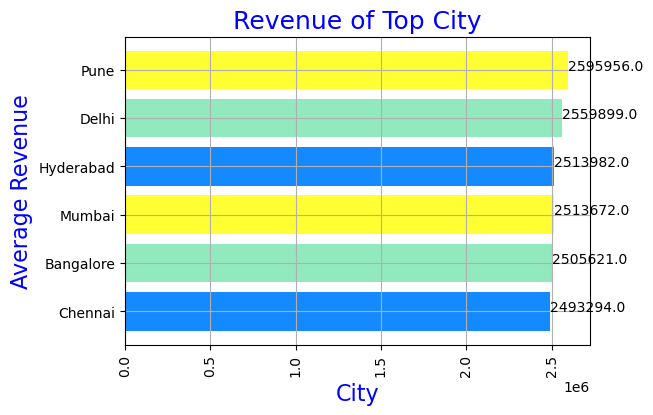

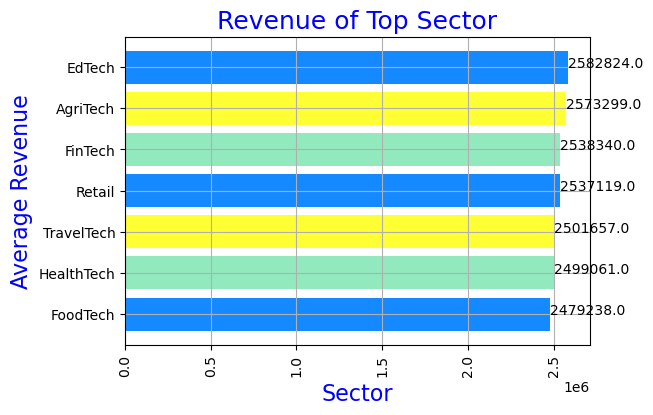

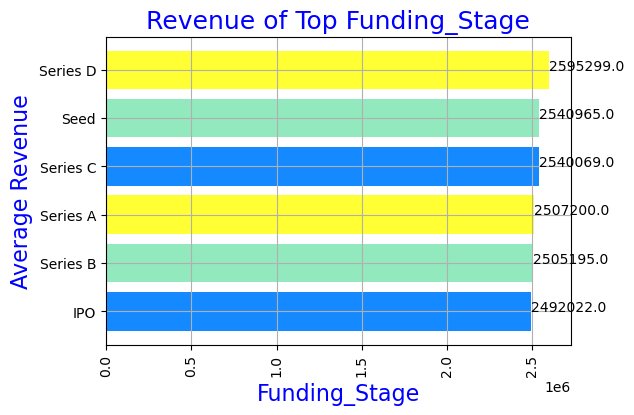

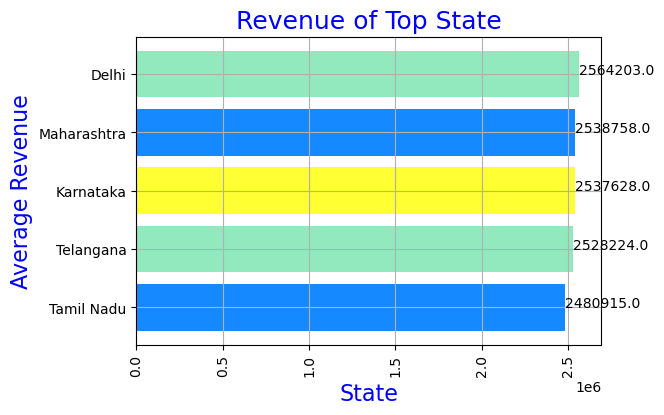

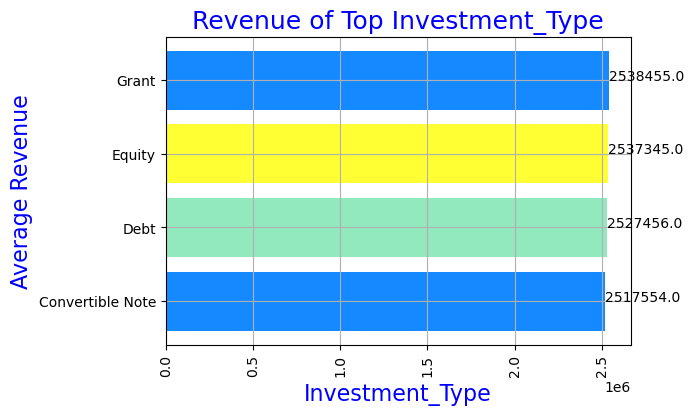

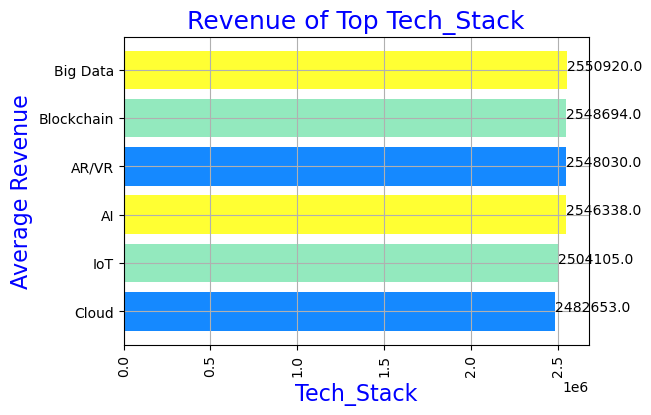

In [17]:
def SrtVis(siid,ctf,rvf):
    grpdt=siid.groupby(["{}".format(ctf)]).agg({"{}".format(rvf): [numpy.mean]}).sort_values(by=("{}".format(rvf),"mean"),ascending=False).iloc[:10]
    ftsii=grpdt.index.tolist()
    vlsii=numpy.round_(grpdt.values.flatten())
    vsdata=pandas.DataFrame({
        "{}".format(ctf):ftsii,
        "{}".format(rvf):vlsii
    })
    vsdata=vsdata.sort_values(by="{}".format(rvf),ascending=True)
    rvmp.figure(figsize=(6,4))
    rvmp.title("{} of Top {}".format(rvf,ctf),fontsize=18,color="b")
    rvmp.barh(vsdata["{}".format(ctf)],vsdata["{}".format(rvf)],color=["#1589FF","#93E9BE","#FFFF33"])
    rvmp.xticks(rotation=90)
    rvmp.xlabel("{}".format(ctf),fontsize=16,color="b")
    rvmp.ylabel("Average {}".format(rvf),fontsize=16,color="b")
    for vsdata_id, vsdata_val in enumerate(vsdata["{}".format(rvf)]):
        rvmp.text(vsdata_val, vsdata_id, str(vsdata_val))
    rvmp.grid()
    rvmp.show()
SrtVis(SIIData,"City","Revenue")
SrtVis(SIIData,"Sector","Revenue")
SrtVis(SIIData,"Funding_Stage","Revenue")
SrtVis(SIIData,"State","Revenue")
SrtVis(SIIData,"Investment_Type","Revenue")
SrtVis(SIIData,"Tech_Stack","Revenue")